In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# --- 설정 ---
DATA_PATH = '/dataset/usr012/jmpark/Moudlar_data/data'
FILE_PATTERN = '*train.csv.gz'
DONE_CONDITIONS = [1, 2]  # 0이 아닌 값 (1 또는 2)
MA_WINDOW = 100           # 이동 평균 윈도우 (100개 에피소드 평균)

# 서브플롯 설정
PLOTS_PER_FIG = 6
PLOT_ROWS = 3
PLOT_COLS = 2

In [3]:
# 1. 파일 리스트 가져오기
file_list = sorted(glob.glob(os.path.join(DATA_PATH, FILE_PATTERN)))
num_files = len(file_list)

In [4]:
if num_files == 0:
    print(f"경고: {DATA_PATH} 경로에서 '{FILE_PATTERN}' 파일을 찾을 수 없습니다.")
else:
    print(f"총 {num_files}개의 파일을 찾았습니다. 그래프 생성을 시작합니다...")

총 38개의 파일을 찾았습니다. 그래프 생성을 시작합니다...


처리 중: cheetah_2_back_20251018_163515_train.csv.gz...
처리 중: cheetah_2_front_20251018_163607_train.csv.gz...
처리 중: cheetah_3_back_20251018_163702_train.csv.gz...
처리 중: cheetah_3_balanced_20251018_163753_train.csv.gz...
처리 중: cheetah_3_front_20251018_163907_train.csv.gz...
처리 중: cheetah_4_allback_20251018_164153_train.csv.gz...
--- training_rewards_figure_1.png 저장 완료 ---


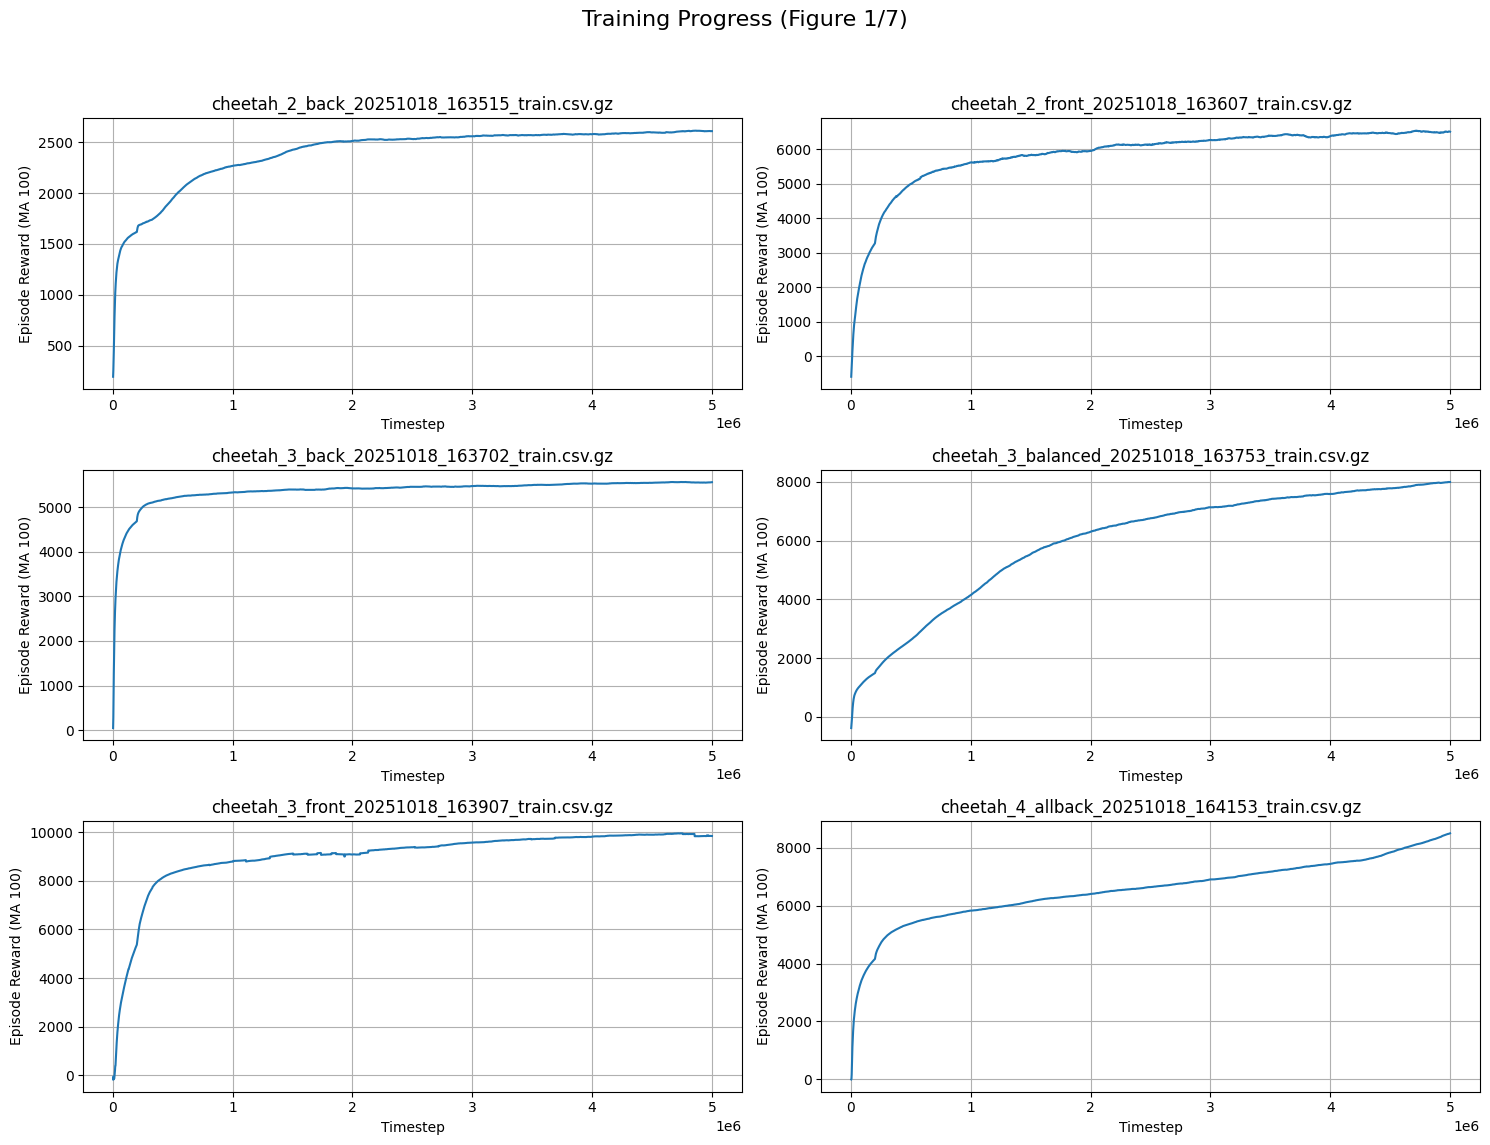

처리 중: cheetah_4_allfront_20251018_164234_train.csv.gz...
처리 중: cheetah_4_back_20251018_164319_train.csv.gz...
처리 중: cheetah_4_front_20251018_164427_train.csv.gz...
처리 중: cheetah_5_back_20251018_164602_train.csv.gz...
처리 중: cheetah_5_balanced_20251018_164649_train.csv.gz...
처리 중: cheetah_5_front_20251018_164738_train.csv.gz...
--- training_rewards_figure_2.png 저장 완료 ---


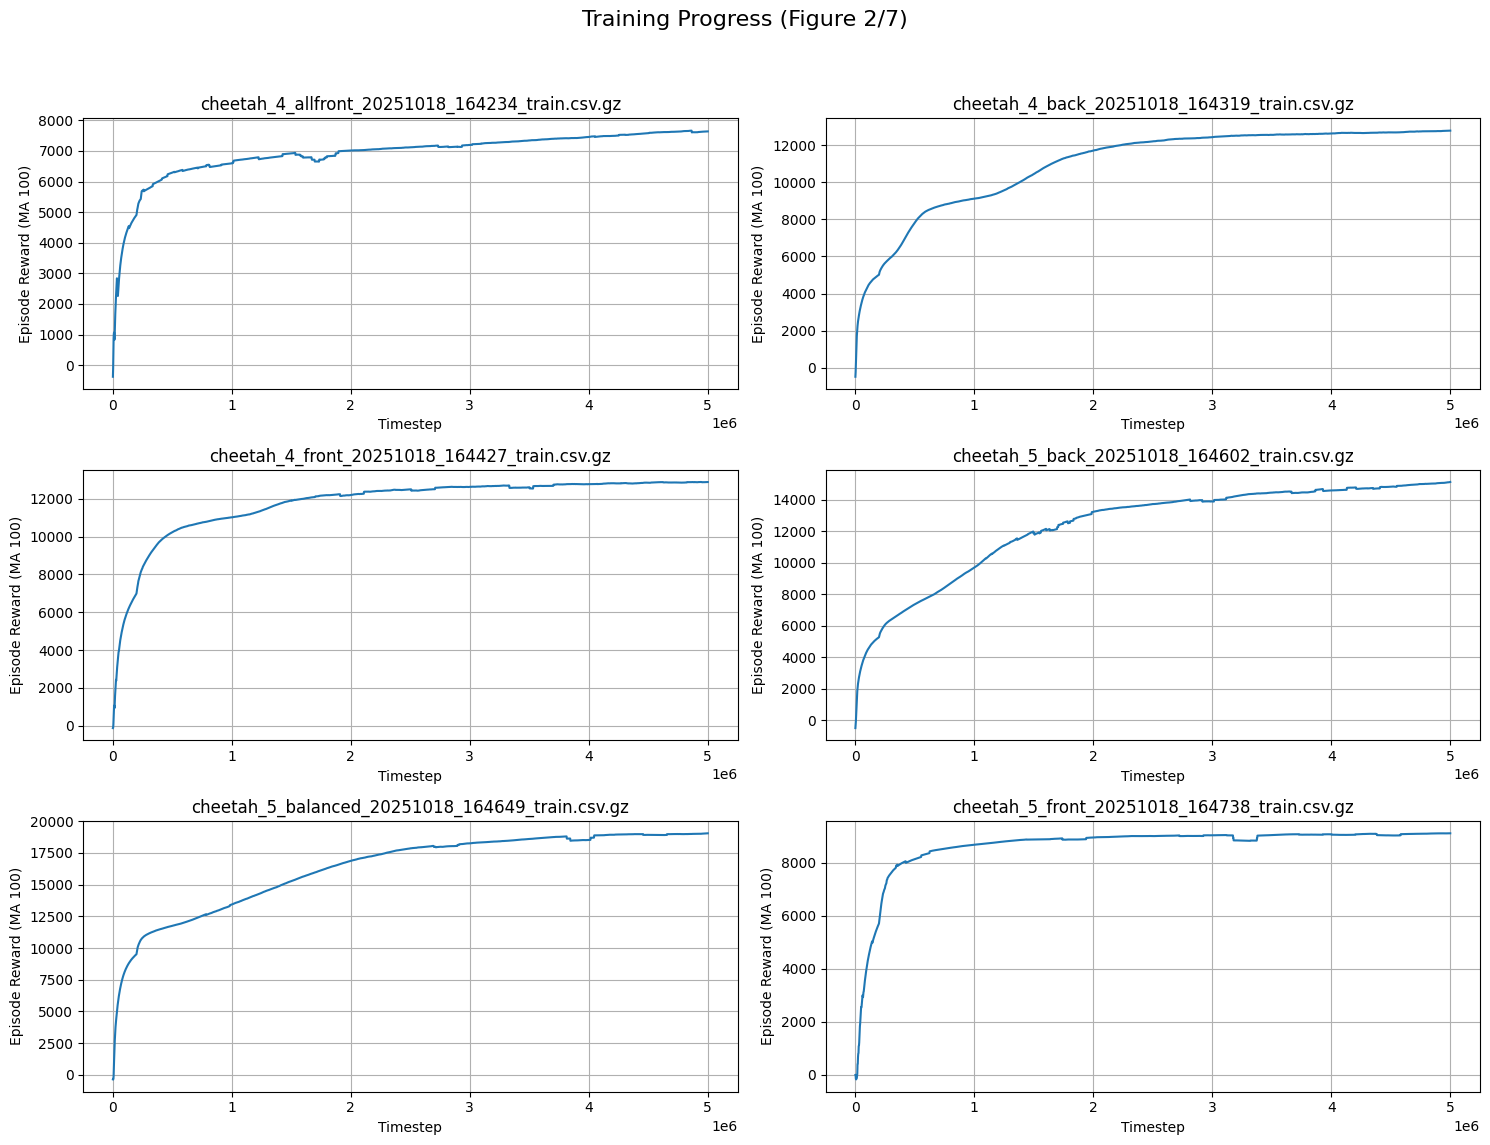

처리 중: cheetah_6_back_20251018_164832_train.csv.gz...
처리 중: cheetah_6_front_20251018_164912_train.csv.gz...
처리 중: cheetah_7_full_20251018_165009_train.csv.gz...
처리 중: hopper_3_20251018_165054_train.csv.gz...
처리 중: hopper_4_20251018_165126_train.csv.gz...
처리 중: hopper_5_20251018_165156_train.csv.gz...
--- training_rewards_figure_3.png 저장 완료 ---


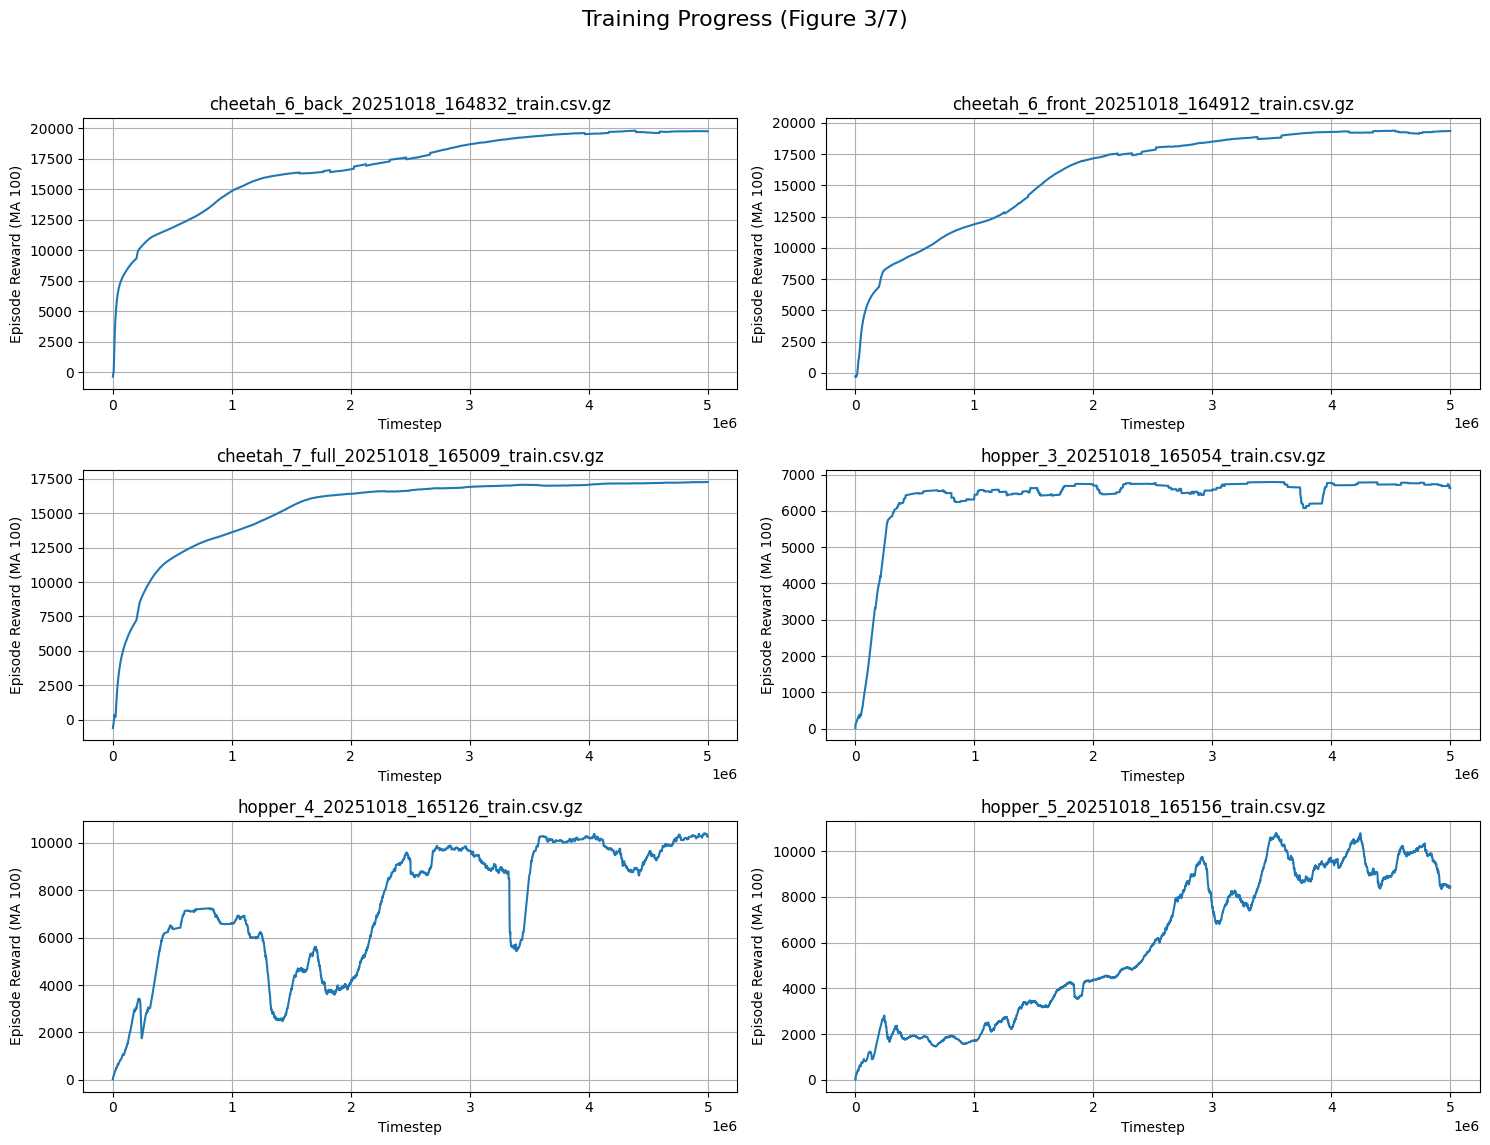

처리 중: humanoid_2d_7_left_arm_20251019_200141_train.csv.gz...
처리 중: humanoid_2d_7_left_leg_20251019_200241_train.csv.gz...
처리 중: humanoid_2d_7_lower_arms_20251019_200352_train.csv.gz...
처리 중: humanoid_2d_7_right_arm_20251019_200506_train.csv.gz...
처리 중: humanoid_2d_7_right_leg_20251019_200611_train.csv.gz...
처리 중: humanoid_2d_8_left_knee_20251019_200717_train.csv.gz...
--- training_rewards_figure_4.png 저장 완료 ---


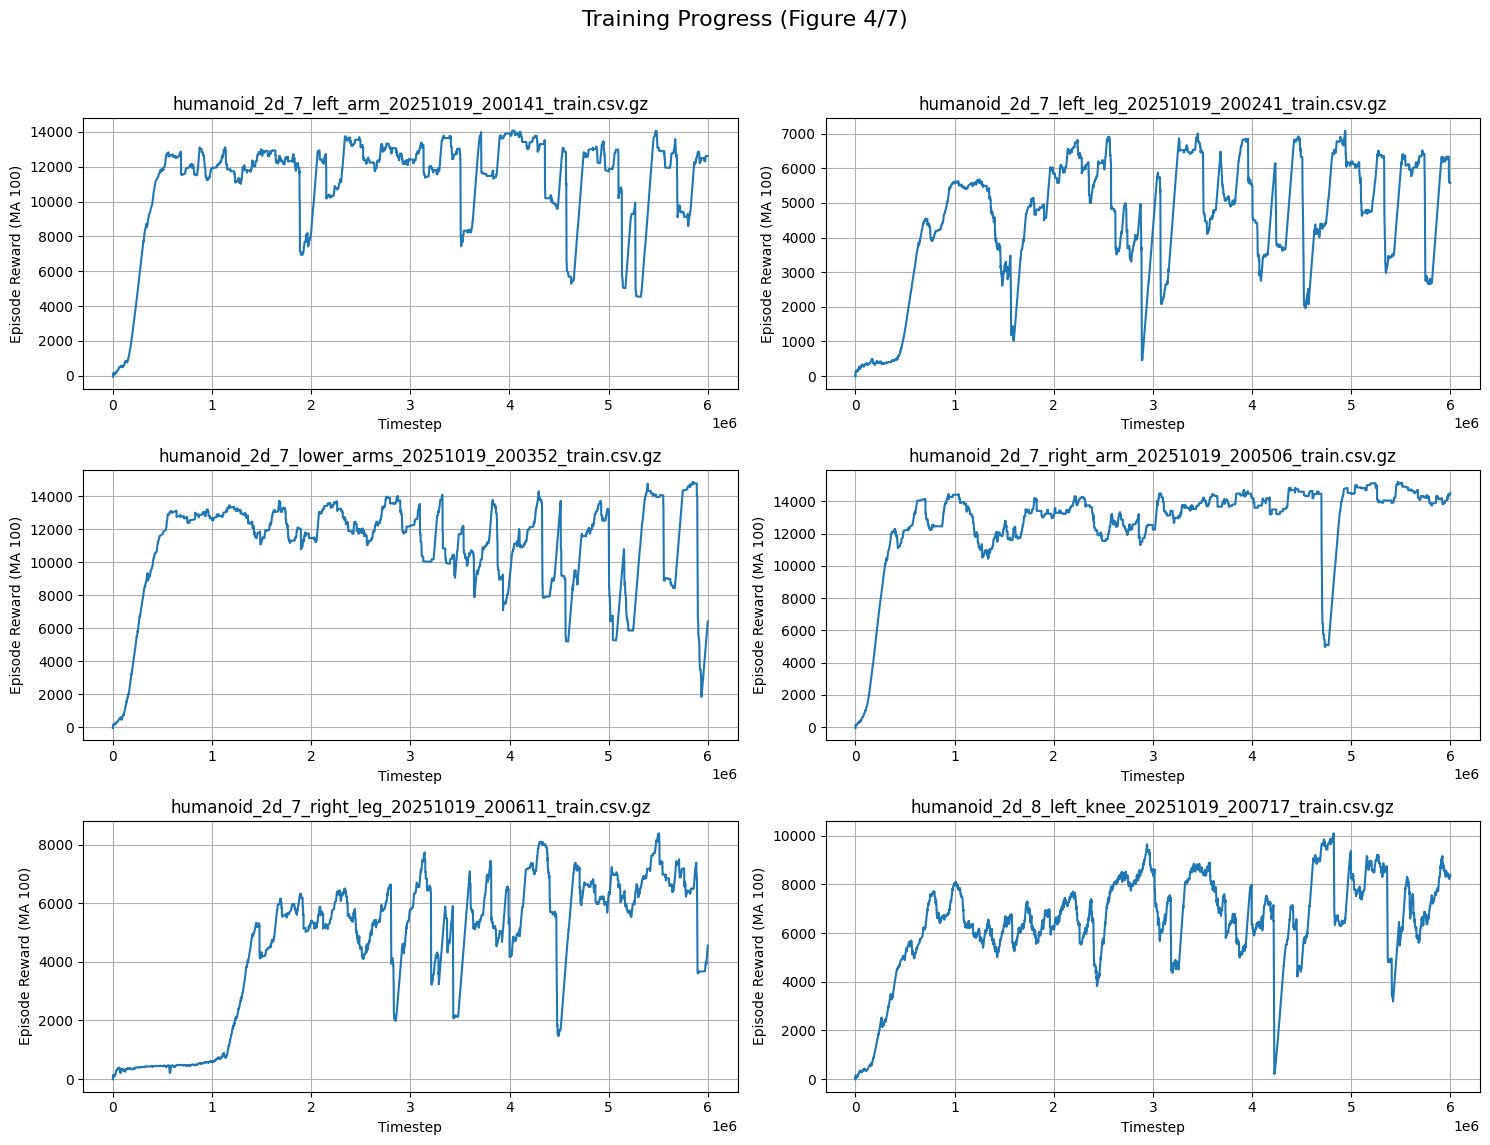

처리 중: humanoid_2d_8_right_knee_20251019_200816_train.csv.gz...
처리 중: humanoid_2d_9_full_20251019_200904_train.csv.gz...
처리 중: walker_2_flipped_20251019_202748_train.csv.gz...
처리 중: walker_2_main_20251019_202731_train.csv.gz...
처리 중: walker_3_flipped_20251020_010230_train.csv.gz...
처리 중: walker_3_main_20251020_010313_train.csv.gz...
--- training_rewards_figure_5.png 저장 완료 ---


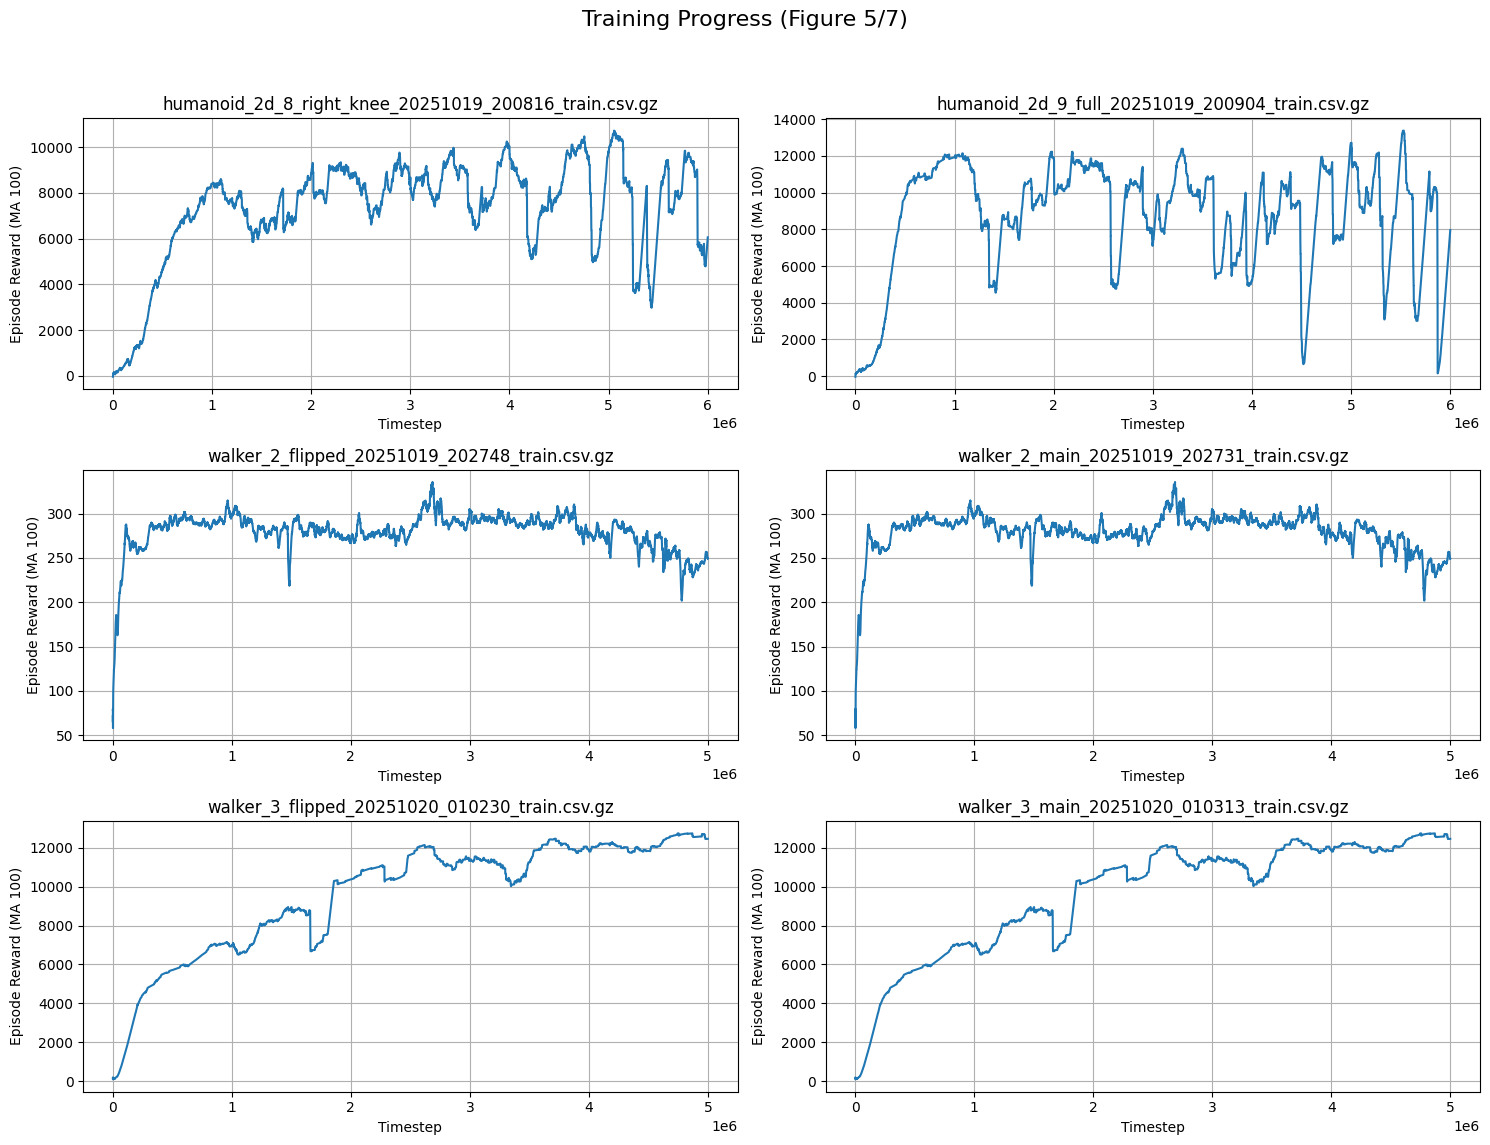

처리 중: walker_4_flipped_20251020_010358_train.csv.gz...
처리 중: walker_4_main_20251020_010459_train.csv.gz...
처리 중: walker_5_flipped_20251020_010536_train.csv.gz...
처리 중: walker_5_main_20251020_024040_train.csv.gz...
처리 중: walker_6_flipped_20251020_024155_train.csv.gz...
처리 중: walker_6_main_20251020_024233_train.csv.gz...
--- training_rewards_figure_6.png 저장 완료 ---


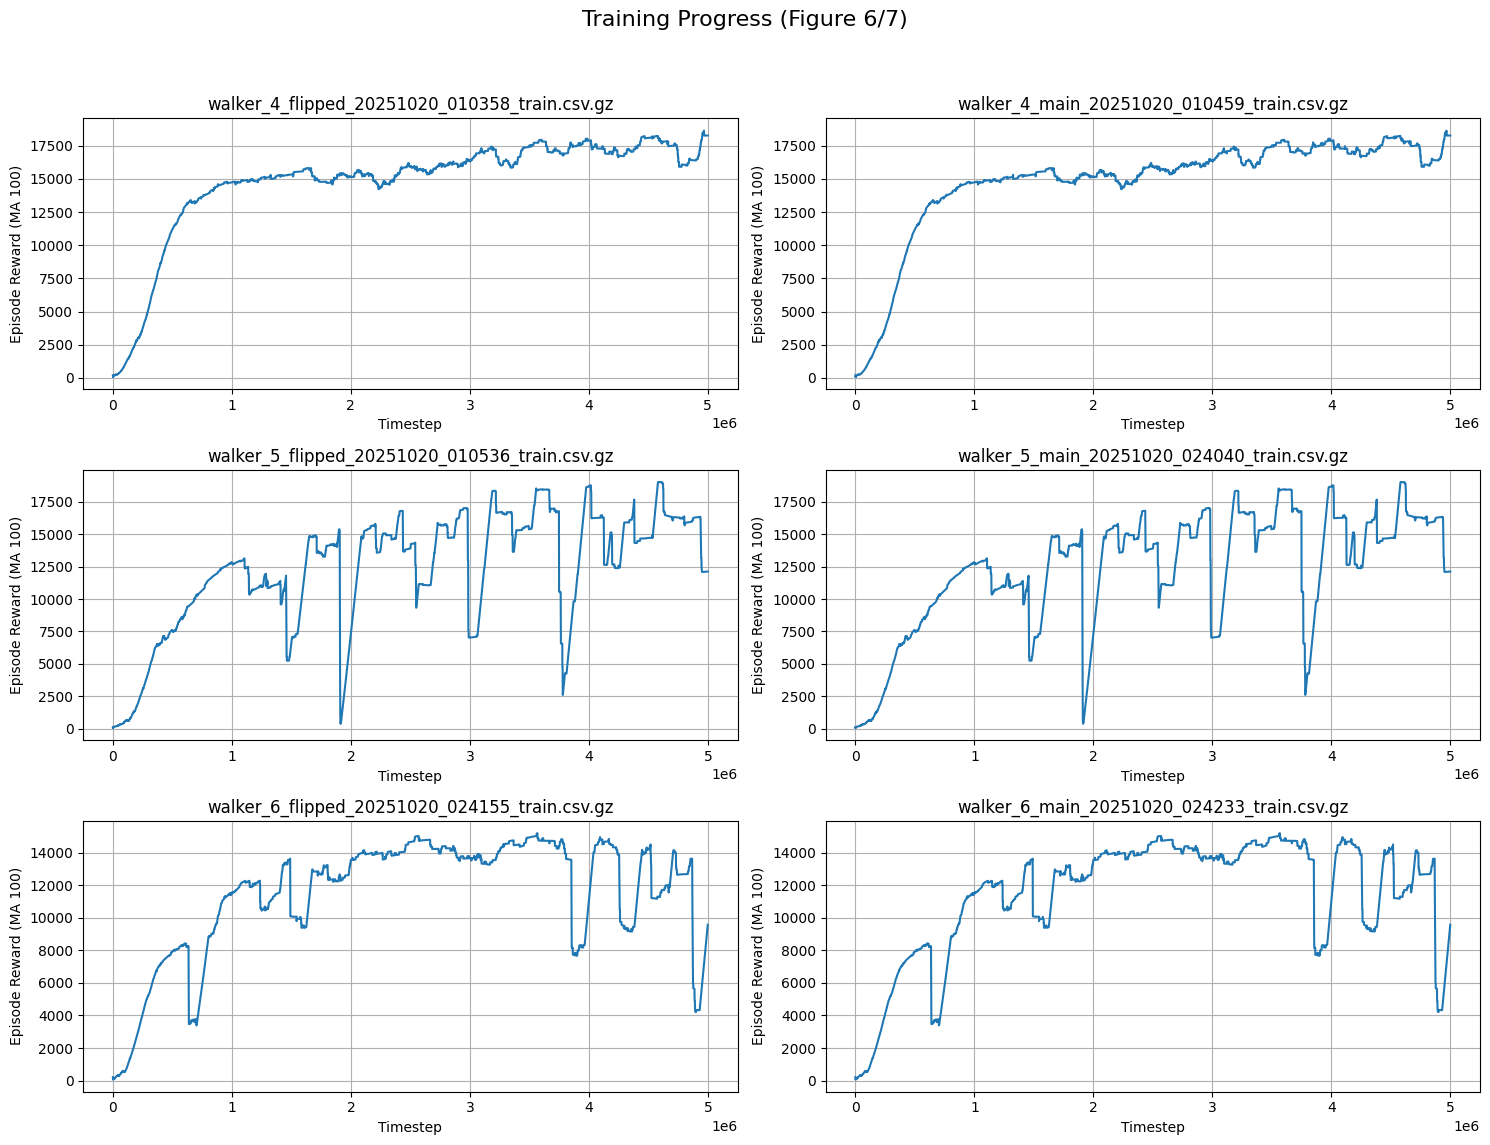

처리 중: walker_7_flipped_20251020_024339_train.csv.gz...
처리 중: walker_7_main_20251020_024410_train.csv.gz...
--- training_rewards_figure_7.png 저장 완료 ---


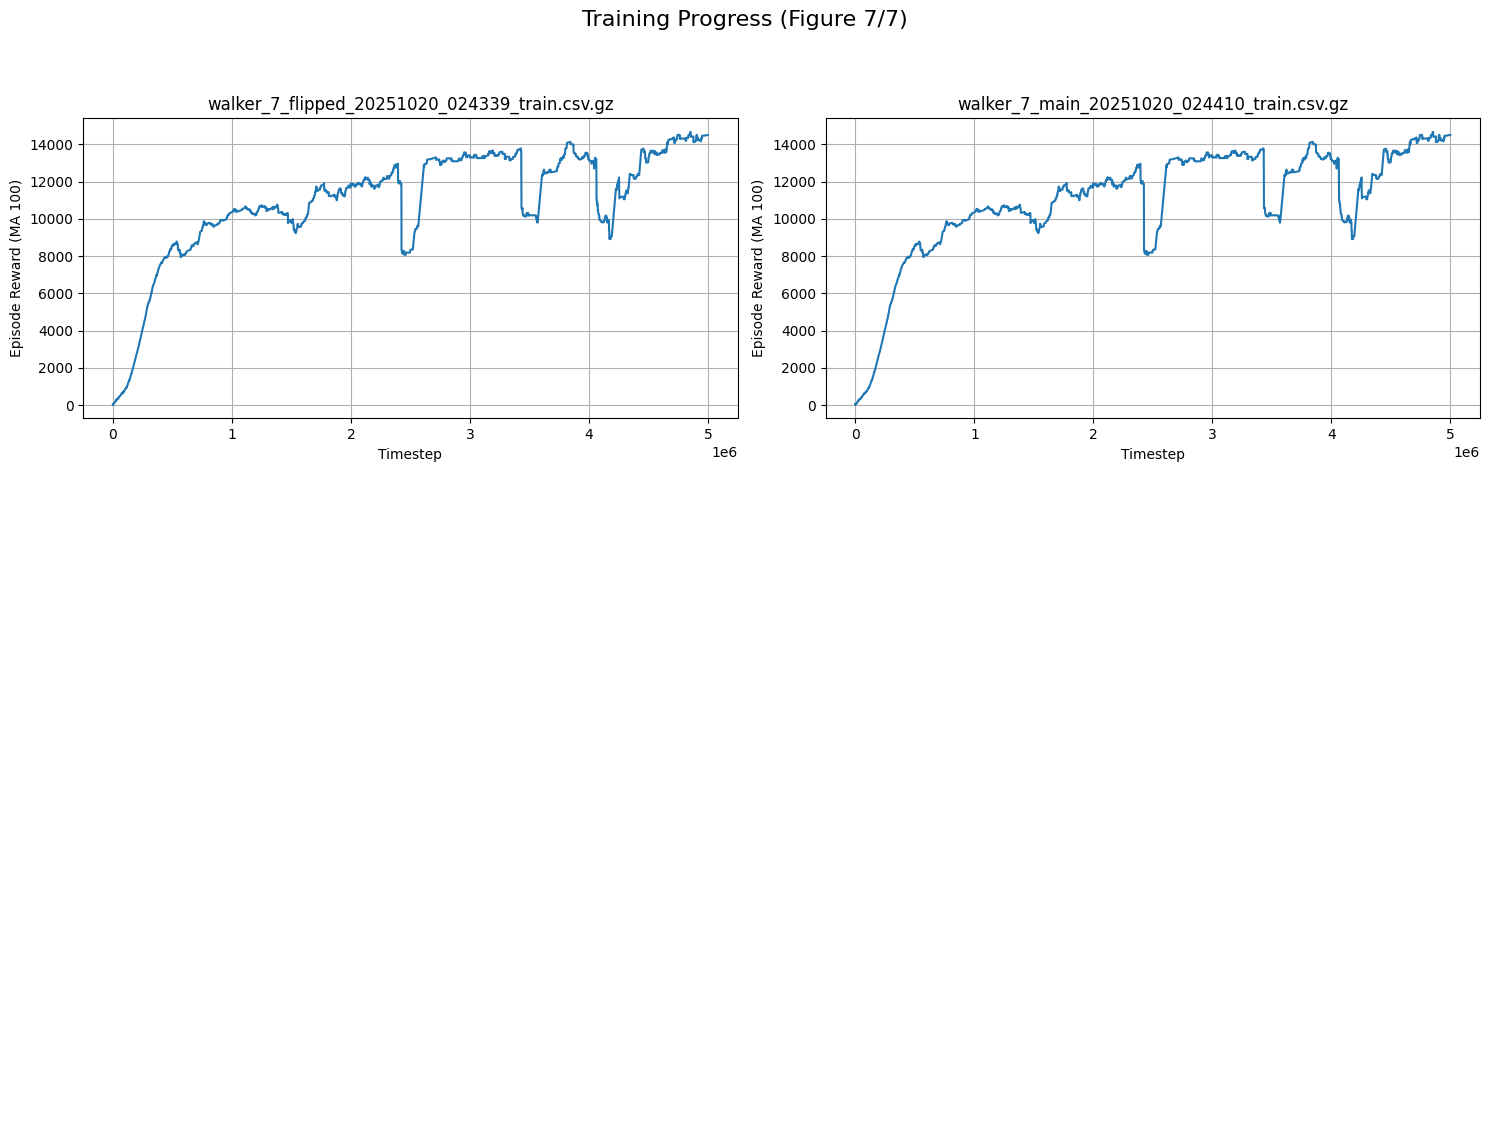

모든 그래프 생성이 완료되었습니다.


In [5]:
# 2. 6개씩 묶어서 그래프 그리기
num_figures = math.ceil(num_files / PLOTS_PER_FIG)
file_iterator = iter(file_list) # 파일 리스트를 순회할 이터레이터

for fig_idx in range(num_figures):
    # 새 Figure 생성
    fig, axes = plt.subplots(PLOT_ROWS, PLOT_COLS, figsize=(15, 12))
    # 1D 배열로 변환하여 쉽게 접근
    axes = axes.flatten()
    
    # 3. 서브플롯 채우기 (최대 6개)
    for ax_idx in range(PLOTS_PER_FIG):
        try:
            # 다음 파일 가져오기
            file_path = next(file_iterator)
            filename = os.path.basename(file_path)
            ax = axes[ax_idx] # 현재 축 선택
            
            print(f"처리 중: {filename}...")

            # 4. 데이터 로드 (메모리 효율을 위해 필요한 컬럼만)
            try:
                df = pd.read_csv(
                    file_path,
                    compression='gzip',
                    usecols=['reward', 'done_code'] # ★★★ 핵심 ★★★
                )
            except Exception as e:
                print(f"  오류: {filename} 파일 로드 실패. {e}")
                ax.set_title(f"{filename}\n(파일 로드 실패)", color='red')
                continue

            episode_rewards = []
            episode_end_steps = []
            current_episode_reward = 0.0

            # 5. 데이터를 순회하며 에피소드 리워드 계산
            for step, (reward, done_code) in enumerate(df.itertuples(index=False)):
                current_episode_reward += reward
                
                # done_code가 0이 아니면 (1 또는 2) 에피소드 종료
                if done_code in DONE_CONDITIONS:
                    episode_rewards.append(current_episode_reward)
                    episode_end_steps.append(step) # 종료 시점의 '전체 스텝'
                    current_episode_reward = 0.0 # 리워드 초기화

            if not episode_rewards:
                print(f"  경고: {filename}에 완료된 에피소드가 없습니다.")
                ax.set_title(f"{filename}\n(완료된 에피소드 없음)", color='orange')
                continue

            # 6. 이동 평균 계산 및 그래프 그리기
            rewards_series = pd.Series(episode_rewards)
            moving_avg = rewards_series.rolling(window=MA_WINDOW, min_periods=1).mean()

            ax.plot(episode_end_steps, moving_avg) # X축: 에피소드 종료 스텝, Y축: 이동 평균 리워드
            ax.set_title(filename)
            ax.set_xlabel("Timestep")
            ax.set_ylabel(f"Episode Reward (MA {MA_WINDOW})")
            ax.grid(True)

        except StopIteration:
            # 처리할 파일이 더 없으면 남은 subplot을 끈다
            axes[ax_idx].axis('off')

    # Figure 저장 및 출력
    fig_filename = f"training_rewards_figure_{fig_idx + 1}.png"
    plt.suptitle(f"Training Progress (Figure {fig_idx + 1}/{num_figures})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # suptitle과 겹치지 않게
    plt.savefig(fig_filename)
    print(f"--- {fig_filename} 저장 완료 ---")
    plt.show() # 주피터 노트북 등이 아니면 주석 처리
    plt.close(fig) # 메모리 해제

print("모든 그래프 생성이 완료되었습니다.")